In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


features = ["mean perimeter", "mean concave points"]
C_values = [1000, 100, 1, 0.1, 0.01]

dataset       = load_breast_cancer()
df            = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["classes"] = dataset.target

X = df[features]
y = df["classes"]

scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Treinamento do modelo e análise de vetores de suporte
Contamos quantos vetores de suporte o modelo gera para cada valor de `C`.

In [3]:
model = SVC(kernel="linear")

support_sets = {}
support_indices_sets = {}

for C in C_values:
    model.set_params(C=C)
    model.fit(X_train, y_train)

    support_vectors = model.support_vectors_
    support_indices = model.support_

    support_sets[C] = support_vectors
    support_indices_sets[C] = set(support_indices)

    print(f"C = {C:>6} -> #Vetores de Suporte: {len(support_vectors)}")

C =   1000 -> #Vetores de Suporte: 79
C =    100 -> #Vetores de Suporte: 79
C =      1 -> #Vetores de Suporte: 84
C =    0.1 -> #Vetores de Suporte: 105
C =   0.01 -> #Vetores de Suporte: 186


## Sobreposição entre os conjuntos de vetores de suporte
Aqui verificamos quantos vetores de suporte são compartilhados entre diferentes valores de `C`.

In [4]:
print("\nSobreposição entre conjuntos de suporte:\n")
for i in range(len(C_values)):
    for j in range(i+1, len(C_values)):
        C1, C2 = C_values[i], C_values[j]
        overlap = support_indices_sets[C1].intersection(support_indices_sets[C2])
        print(f"Overlap entre C={C1} e C={C2}: {len(overlap)} vetores")


Sobreposição entre conjuntos de suporte:

Overlap entre C=1000 e C=100: 79 vetores
Overlap entre C=1000 e C=1: 79 vetores
Overlap entre C=1000 e C=0.1: 79 vetores
Overlap entre C=1000 e C=0.01: 79 vetores
Overlap entre C=100 e C=1: 79 vetores
Overlap entre C=100 e C=0.1: 79 vetores
Overlap entre C=100 e C=0.01: 79 vetores
Overlap entre C=1 e C=0.1: 84 vetores
Overlap entre C=1 e C=0.01: 84 vetores
Overlap entre C=0.1 e C=0.01: 105 vetores


## Justificativa matemática

A função objetivo da SVM é:
$$ \min_{w, b, \xi} \left( \frac{1}{2} \|w\|^2 + C \sum_i \xi_i \right) $$

- `C` controla o equilíbrio entre margem grande (generalização) e penalização de erros.
- `C` grande: modelo tenta minimizar os erros de treino, com margem estreita → poucos vetores de suporte.
- `C` pequeno: modelo aceita erros e prioriza margem larga → muitos vetores de suporte.

**Vetores de suporte incluem:**
- Pontos sobre a margem
- Pontos dentro da margem (slack > 0)

Por isso, ao diminuir `C`, mais pontos violam ou tocam a margem, aumentando o número total de vetores de suporte.

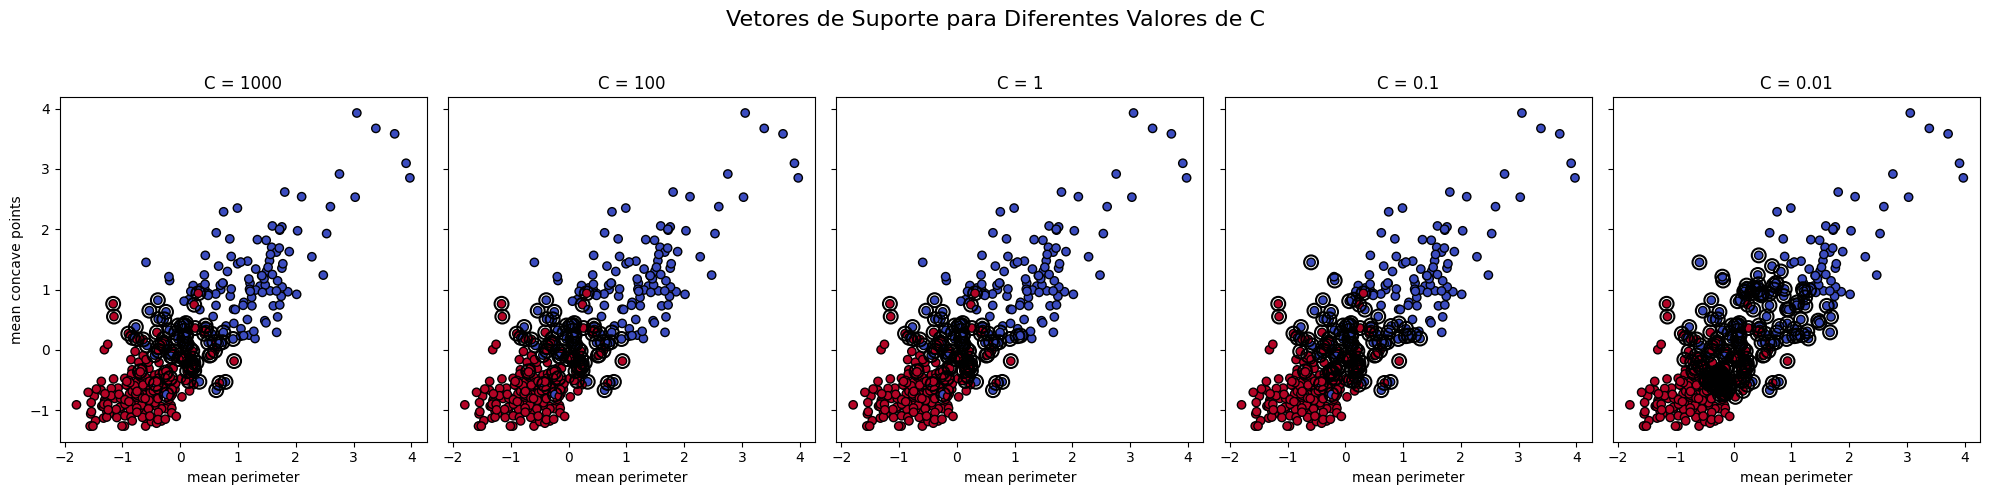

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ["mean perimeter", "mean concave points"]
C_values = [1000, 100, 1, 0.1, 0.01]

dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["classes"] = dataset.target

X = df[features]
y = df["classes"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = SVC(kernel="linear")

fig, axs = plt.subplots(1, len(C_values), figsize=(20, 5), sharex=True, sharey=True)

for i, C in enumerate(C_values):
    model.set_params(C=C)
    model.fit(X_train, y_train)

    ax = axs[i]
    ax.set_title(f"C = {C}")

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolors="k", label="Treino")

    support_vectors = model.support_vectors_
    ax.scatter(support_vectors[:, 0], support_vectors[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5, label="Vetores de Suporte")

    ax.set_xlabel(features[0])
    if i == 0:
        ax.set_ylabel(features[1])

plt.suptitle("Vetores de Suporte para Diferentes Valores de C", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
